# Portfolio with the Maximum Sharpe Ratio for the PSU Banks Sector

In [1]:
import random
random.seed(3)

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2021,12,31).date()

tickers= ['SBIN.NS', 'BANKBARODA.NS', 'CANBK.NS', 'PNB.NS', 'UNIONBANK.NS',
         'BANKINDIA.NS', 'INDIANB.NS', 'IOB.NS', 'CENTRALBK.NS', 'MAHABANK.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SBIN.NS  BANKBARODA.NS  CANBK.NS   PNB.NS  UNIONBANK.NS  \
Date                                                                  
2017-01-02      NaN            NaN       NaN      NaN           NaN   
2017-01-03  0.00534       -0.00201   0.00895  0.02119       0.00558   
2017-01-04 -0.00817       -0.00404  -0.00340 -0.02372      -0.00554   
2017-01-05  0.01009        0.01993   0.00928  0.02082       0.01872   
2017-01-06  0.00224        0.01524   0.01502  0.01190       0.00977   
...             ...            ...       ...      ...           ...   
2021-12-24 -0.01050       -0.02155  -0.03267 -0.03026      -0.03146   
2021-12-27  0.00241        0.00503   0.00851  0.01085      -0.00348   
2021-12-28  0.00688        0.01315   0.01150  0.00134       0.02794   
2021-12-29 -0.01474        0.00062  -0.00581 -0.00402      -0.01359   
2021-12-30 -0.00594       -0.00988  -0.00864  0.00000      -0.01722   

            BANKINDIA.NS  INDIANB.NS   IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                      
2017-01-02           NaN         NaN      NaN           NaN          NaN  
2017-01-03       0.00838     0.00629  0.01035      -0.00709      0.00344  
2017-01-04      -0.00600     0.00759 -0.00410      -0.00298      0.00000  
2017-01-05       0.01718     0.00820  0.01029       0.00000      0.00343  
2017-01-06       0.00913     0.02900  0.00000      -0.00358     -0.00171  
...                  ...         ...      ...           ...          ...  
2021-12-24      -0.02182    -0.02792  0.02970       0.03783      0.00000  
2021-12-27      -0.00873    -0.01054 -0.01442      -0.02050     -0.00510  
2021-12-28       0.00489     0.03600  0.00488       0.00000      0.00000  
2021-12-29       0.00000    -0.00957 -0.00485      -0.00233     -0.01026  
2021-12-30      -0.00974    -0.01253 -0.00732      -0.00932     -0.01295  

[1235 rows x 10 columns]

In [19]:
df_training = df[0:988]

In [20]:
df_training.tail()

SBIN.NS  BANKBARODA.NS  CANBK.NS   PNB.NS  UNIONBANK.NS  \
Date                                                                  
2020-12-24  0.01464        0.00495   0.00041 -0.01101       0.00843   
2020-12-28  0.03129        0.02547   0.03727  0.03021       0.02007   
2020-12-29  0.00981       -0.00080   0.00878  0.02469       0.04590   
2020-12-30 -0.00360       -0.00401   0.02374 -0.01355       0.00157   
2020-12-31 -0.00704       -0.01047  -0.00309  0.00916      -0.01252   

            BANKINDIA.NS  INDIANB.NS   IOB.NS  CENTRALBK.NS  MAHABANK.NS  
Date                                                                      
2020-12-24       0.00411     0.01230  0.00000       0.00362      0.00379  
2020-12-28       0.01022     0.02373  0.00943       0.01444      0.00377  
2020-12-29       0.00000    -0.00170 -0.00935      -0.01068     -0.01128  
2020-12-30      -0.00405    -0.01416 -0.00943      -0.01079     -0.00760  
2020-12-31      -0.01016    -0.01551  0.01905       0.00727      0.00000

In [21]:
mean_returns = df_training.mean() 
cov_matrix = df_training.cov()

print(mean_returns)
print(cov_matrix)

SBIN.NS          0.000418
BANKBARODA.NS   -0.000477
CANBK.NS        -0.000230
PNB.NS          -0.000806
UNIONBANK.NS    -0.000963
BANKINDIA.NS    -0.000365
INDIANB.NS      -0.000450
IOB.NS          -0.000546
CENTRALBK.NS    -0.001401
MAHABANK.NS     -0.000446
dtype: float64
                SBIN.NS  BANKBARODA.NS  CANBK.NS    PNB.NS  UNIONBANK.NS  \
SBIN.NS        0.000583       0.000532  0.000569  0.000528      0.000500   
BANKBARODA.NS  0.000532       0.000838  0.000692  0.000690      0.000636   
CANBK.NS       0.000569       0.000692  0.000943  0.000748      0.000731   
PNB.NS         0.000528       0.000690  0.000748  0.000969      0.000731   
UNIONBANK.NS   0.000500       0.000636  0.000731  0.000731      0.000891   
BANKINDIA.NS   0.000490       0.000634  0.000706  0.000696      0.000696   
INDIANB.NS     0.000424       0.000553  0.000639  0.000583      0.000608   
IOB.NS         0.000243       0.000324  0.000368  0.000380      0.000384   
CENTRALBK.NS   0.000251       0.000325  0

In [22]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
import random
random.seed(3)

In [24]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [25]:
result

array([[-0.11732741,  0.37434325, -0.31342199, ...,  0.08407153,
         0.03986265,  0.05559866],
       [-0.13585066,  0.35212938, -0.38579758, ...,  0.1284687 ,
         0.09727487,  0.09666418],
       [-0.10963562,  0.38471276, -0.28498047, ...,  0.00926187,
         0.0327636 ,  0.12267344],
       ...,
       [-0.13497116,  0.37889248, -0.35622549, ...,  0.0607231 ,
         0.08512874,  0.0465583 ],
       [-0.13625524,  0.38380072, -0.35501559, ...,  0.06709151,
         0.04911822,  0.04795118],
       [-0.13739975,  0.3665272 , -0.37486918, ...,  0.06216659,
         0.08791785,  0.131738  ]])

In [26]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean',
 'sd',
 'Sharpe',
 'SBIN.NS',
 'BANKBARODA.NS',
 'CANBK.NS',
 'PNB.NS',
 'UNIONBANK.NS',
 'BANKINDIA.NS',
 'INDIANB.NS',
 'IOB.NS',
 'CENTRALBK.NS',
 'MAHABANK.NS']

In [27]:
result = pd.DataFrame(result,columns=columns)
result

mean        sd    Sharpe   SBIN.NS  BANKBARODA.NS  CANBK.NS  \
0    -0.117327  0.374343 -0.313422  0.130697       0.122283  0.101352   
1    -0.135851  0.352129 -0.385798  0.100029       0.165564  0.018672   
2    -0.109636  0.384713 -0.284980  0.072806       0.178610  0.192464   
3    -0.117224  0.347200 -0.337628  0.151711       0.119207  0.185807   
4    -0.092730  0.370660 -0.250176  0.231037       0.054219  0.144503   
...        ...       ...       ...       ...            ...       ...   
9995 -0.150858  0.358737 -0.420525  0.012922       0.161544  0.022449   
9996 -0.124565  0.369631 -0.336998  0.117228       0.066792  0.009950   
9997 -0.134971  0.378892 -0.356225  0.072615       0.150012  0.169005   
9998 -0.136255  0.383801 -0.355016  0.085446       0.029427  0.109736   
9999 -0.137400  0.366527 -0.374869  0.058545       0.083068  0.111176   

        PNB.NS  UNIONBANK.NS  BANKINDIA.NS  INDIANB.NS    IOB.NS  \
0     0.146111      0.114428      0.098866    0.106731  0.084072   
1     0.005425      0.144950      0.061700    0.181253  0.128469   
2     0.002898      0.126999      0.140367    0.121158  0.009262   
3     0.075206      0.002411      0.061127    0.022483  0.185732   
4     0.026853      0.083104      0.211428    0.086341  0.038189   
...        ...           ...           ...         ...       ...   
9995  0.035621      0.092725      0.166643    0.153803  0.093873   
9996  0.123322      0.183247      0.115036    0.165931  0.077803   
9997  0.133270      0.101164      0.048052    0.133473  0.060723   
9998  0.205438      0.131918      0.064767    0.209107  0.067092   
9999  0.020696      0.162695      0.136633    0.145365  0.062167   

      CENTRALBK.NS  MAHABANK.NS  
0         0.039863     0.055599  
1         0.097275     0.096664  
2         0.032764     0.122673  
3         0.151638     0.044679  
4         0.116793     0.007531  
...            ...          ...  
9995      0.111399     0.149022  
9996      0.011876     0.128816  
9997      0.085129     0.046558  
9998      0.049118     0.047951  
9999      0.087918     0.131738  

[10000 rows x 13 columns]

In [28]:
result.shape

(10000, 13)

In [29]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

mean            -0.050266
sd               0.363195
Sharpe          -0.138399
SBIN.NS          0.301839
BANKBARODA.NS    0.116092
CANBK.NS         0.156415
PNB.NS           0.023648
UNIONBANK.NS     0.018768
BANKINDIA.NS     0.188229
INDIANB.NS       0.003493
IOB.NS           0.094778
CENTRALBK.NS     0.033558
MAHABANK.NS      0.063180
Name: 2322, dtype: float64


In [30]:
Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean            -0.136675
sd               0.324555
Sharpe          -0.421114
SBIN.NS          0.231338
BANKBARODA.NS    0.042630
CANBK.NS         0.006421
PNB.NS           0.020767
UNIONBANK.NS     0.117118
BANKINDIA.NS     0.014044
INDIANB.NS       0.041372
IOB.NS           0.191981
CENTRALBK.NS     0.219935
MAHABANK.NS      0.114395
Name: 7376, dtype: float64


In [31]:
result.iloc[5395]

mean            -0.158814
sd               0.360855
Sharpe          -0.440105
SBIN.NS          0.041510
BANKBARODA.NS    0.057353
CANBK.NS         0.106722
PNB.NS           0.107059
UNIONBANK.NS     0.104938
BANKINDIA.NS     0.115765
INDIANB.NS       0.126121
IOB.NS           0.105976
CENTRALBK.NS     0.153844
MAHABANK.NS      0.080713
Name: 5395, dtype: float64

In [32]:
result.iloc[8632]

mean            -0.140360
sd               0.361545
Sharpe          -0.388221
SBIN.NS          0.085560
BANKBARODA.NS    0.152231
CANBK.NS         0.142706
PNB.NS           0.026203
UNIONBANK.NS     0.119011
BANKINDIA.NS     0.115807
INDIANB.NS       0.046893
IOB.NS           0.052084
CENTRALBK.NS     0.150892
MAHABANK.NS      0.108612
Name: 8632, dtype: float64

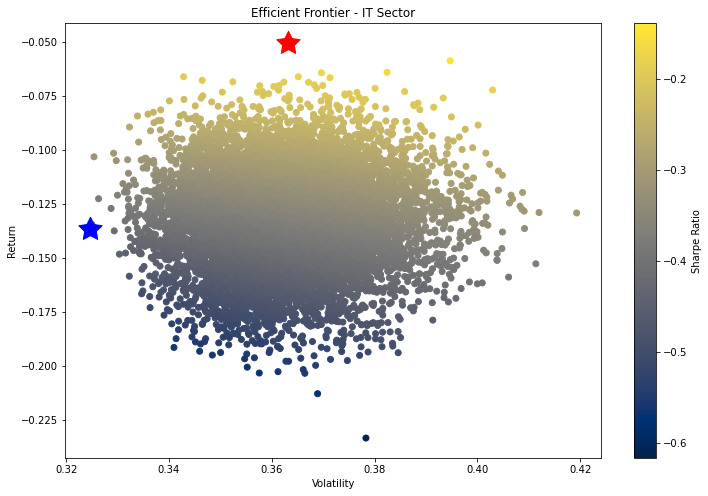

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Efficient Frontier - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()